Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel(".//FlightPriceDataSets//Data_Train1.xlsx")

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There is only one missing value each for Route and Total_Stops so just dropping them

In [5]:
df = df.dropna()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
df1=df.copy()

In [8]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


mean price is 9087

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


The problem is to predict the price and it is a continuous value so it is a regression problem

creating additional features from Date of journey

creating day month and year for date of journey future

In [10]:
df['Day'],df['Month'],df['Year'] = df['Date_of_Journey'].str.split('/',3).str


In [11]:
df['Day']=df['Day'].astype(int)

In [12]:
df['Month']=df['Month'].astype(int)

In [13]:
df['Year']=df['Year'].astype(int)

In [14]:
df['Dep_Hr'],df['Dep_Min'] = df['Dep_Time'].str.split(':',2).str


from departure time creating hour and min features

In [15]:
df['Dep_Hr']=df['Dep_Hr'].astype(int)

In [16]:
df['Dep_Min']=df['Dep_Min'].astype(int)

In [17]:
df['Arrival_Time'].unique()[0:10]

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', '23:30', '21:35', '11:25',
       '10:25 13 Mar', '05:05 02 Mar', '19:15', '23:00'], dtype=object)

In [18]:
df['Arrival_Time'].str.split(' ',1)

0        [01:10, 22 Mar]
1                [13:15]
2        [04:25, 10 Jun]
3                [23:30]
4                [21:35]
              ...       
10678            [22:25]
10679            [23:20]
10680            [11:20]
10681            [14:10]
10682            [19:15]
Name: Arrival_Time, Length: 10682, dtype: object

In [19]:
df['Arrival_Time'],date1 = df['Arrival_Time'].str.split(' ',1).str


from arrival time creating hour and minutes feature

In [20]:
df['Arr_Hr'],df['Arr_Min'] = df['Arrival_Time'].str.split(':',2).str


In [21]:
df['Arr_Hr']=df['Arr_Hr'].astype(int)

In [22]:
df['Arr_Min']=df['Arr_Min'].astype(int)

From Duration feature tranforming itto total minutes

In [23]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [24]:
def add0M0H(x):
    if 'h' not in x:
        x="0h"+x
    if x[-1]=='h':
        return x+"0m"
    else:
        return x

In [25]:
df['Duration'].apply(add0M0H).unique()

array(['2h 50m', '7h 25m', '19h0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h0m', '21h 20m', '18h 45m',
       '12h 20m', '18h0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m', '16h0m', 

In [26]:
df['Duration']=df['Duration'].apply(add0M0H)

In [27]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h0m', '21h 20m', '18h 45m',
       '12h 20m', '18h0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m', '16h0m', 

In [28]:
df['Duration'] = df['Duration'].str.replace('h',':').str.replace('m','')

In [29]:
df['Duration'].unique()

array(['2: 50', '7: 25', '19:0', '5: 25', '4: 45', '2: 25', '15: 30',
       '21: 5', '25: 30', '7: 50', '13: 15', '2: 35', '2: 15', '12: 10',
       '26: 35', '4: 30', '22: 35', '23:0', '20: 35', '5: 10', '15: 20',
       '2: 55', '13: 20', '15: 10', '5: 45', '5: 55', '13: 25', '22:0',
       '5: 30', '10: 25', '5: 15', '2: 30', '6: 15', '11: 55', '11: 5',
       '8: 30', '22: 5', '2: 45', '12:0', '16: 5', '19: 55', '3: 15',
       '25: 20', '3:0', '16: 15', '15: 5', '6: 30', '25: 5', '12: 25',
       '27: 20', '10: 15', '10: 30', '1: 30', '1: 25', '26: 30', '7: 20',
       '13: 30', '5:0', '19: 5', '14: 50', '2: 40', '22: 10', '9: 35',
       '10:0', '21: 20', '18: 45', '12: 20', '18:0', '9: 15', '17: 30',
       '16: 35', '12: 15', '7: 30', '24:0', '8: 55', '7: 10', '14: 30',
       '30: 20', '15:0', '12: 45', '10: 10', '15: 25', '14: 5', '20: 15',
       '23: 10', '18: 10', '16:0', '2: 20', '8:0', '16: 55', '3: 10',
       '14:0', '23: 50', '21: 40', '21: 15', '10: 50', '8: 15', '8

In [30]:
df['Duration_Hr'],df['Duration_Min'] = df['Duration'].str.split(':',2).str

In [31]:
df['Duration_Hr']=df['Duration_Hr'].astype(int)

In [32]:
sorted(df['Duration_Hr'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 47]

In [33]:
df['Duration_Min'].unique()

array([' 50', ' 25', '0', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40', '5'], dtype=object)

In [34]:
def removeSpac(x):
    return str(x).strip()

In [35]:
df['Duration_Min']=df['Duration_Min'].apply(removeSpac)

In [36]:
df['Duration_Min'].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [37]:
df['Duration_Min']=df['Duration_Min'].astype(int)

In [38]:
sorted(df['Duration_Min'].unique())

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

Converting total stops to a numeric column with number of stops

In [39]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: "0" if 'non-stop' in x else x)

In [41]:
df['Total_Stops'].unique()

array(['0', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [42]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: x[0])

In [43]:
df['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [44]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [45]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [46]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No info','No Info')

In [47]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [48]:
#subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
#df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [49]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


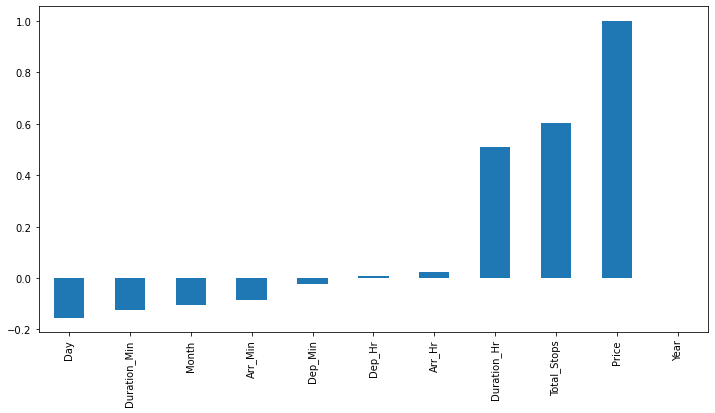

In [50]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar');

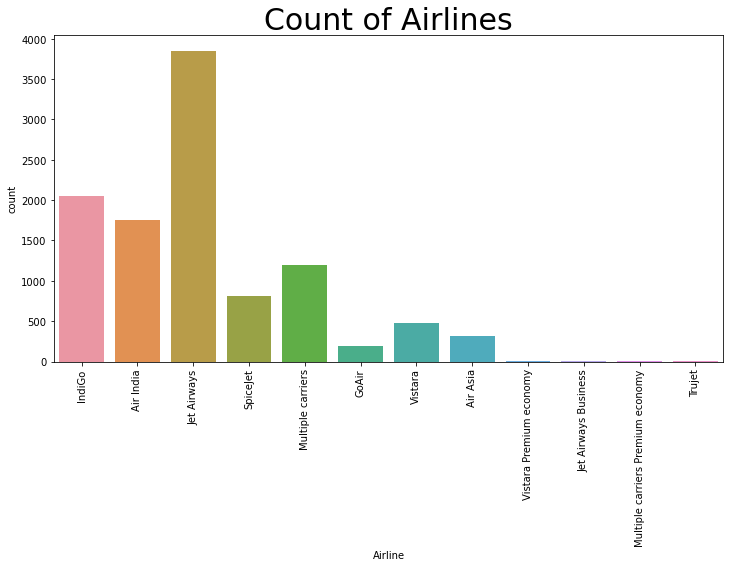

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'])
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

High number of flights are Jet Airways

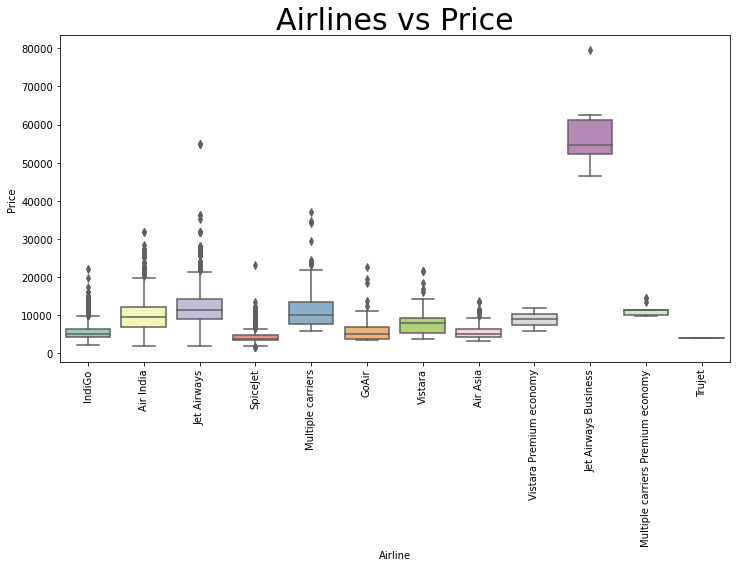

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

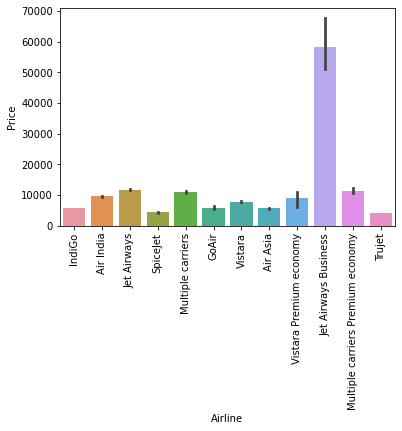

In [55]:
sns.barplot(y='Price',x='Airline',data=df)
plt.xticks(rotation=90);

In [ ]:
Highest price is charged by Jet Airways business and least is by Indigo

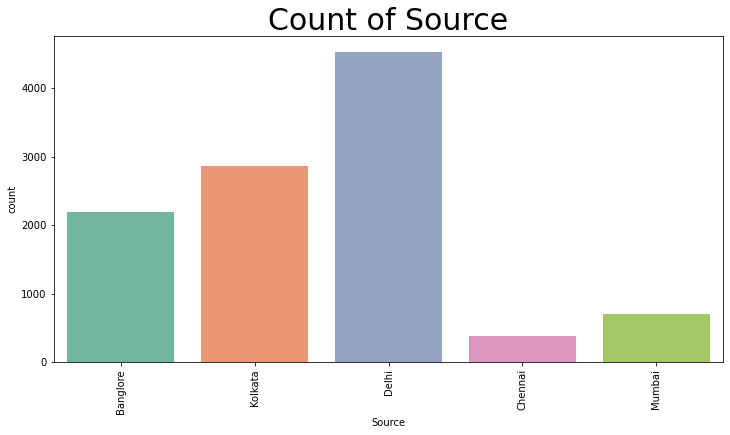

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90);

Highest number of flights travel from Delhi

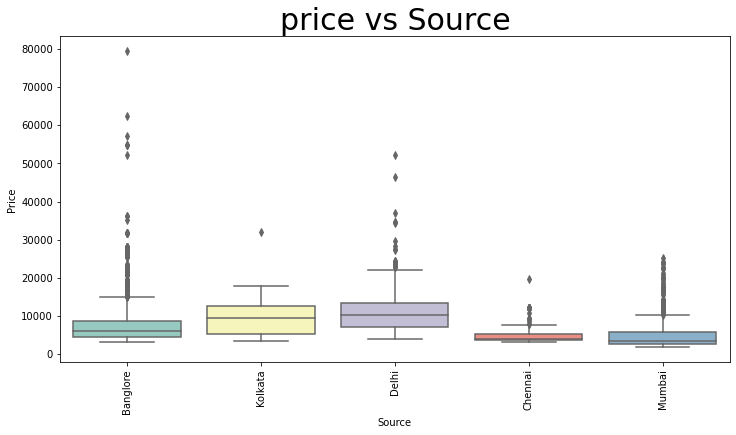

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Source'], df['Price'], palette='Set3')
plt.title('price vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

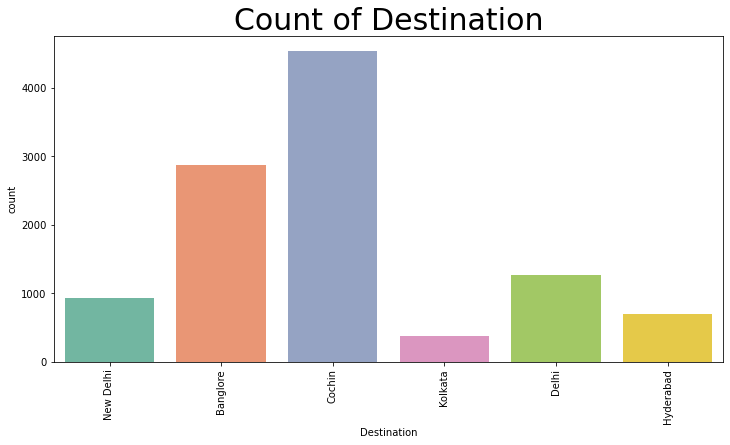

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(df['Destination'], palette='Set2')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90);

highest number of flights are destined to Cochin

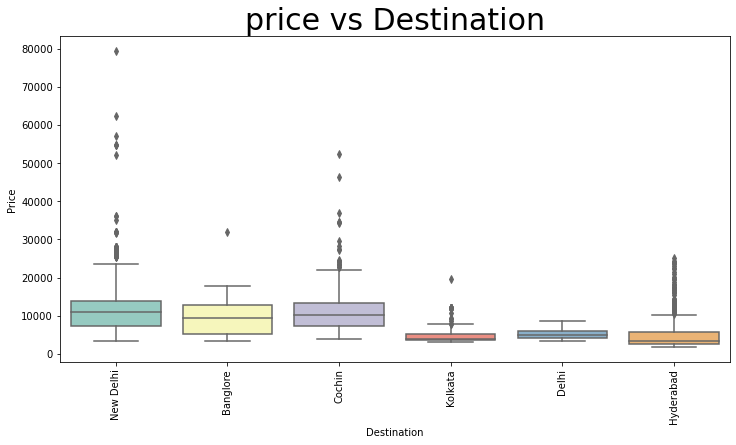

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Destination'], df['Price'], palette='Set3')
plt.title('price vs Destination', size=30)
plt.xticks(rotation=90)
plt.show()

df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

In [57]:
df['Month']=df['Month'].astype(int)

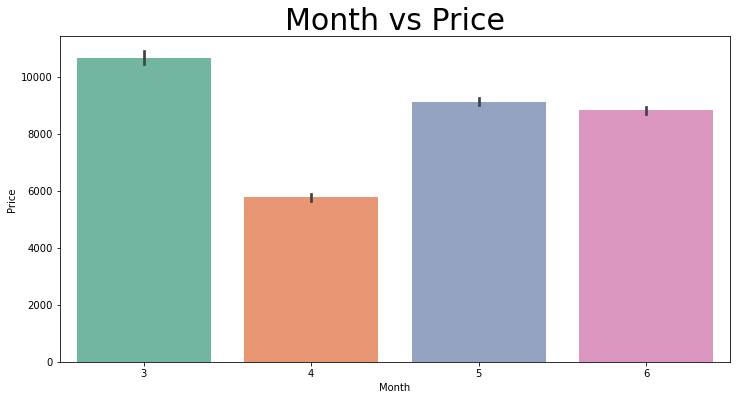

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
#plt.xticks(rotation=90)
plt.show()

Mean highest price is charged in March

In [59]:
df['Duration_Hr'].head()

0     2
1     7
2    19
3     5
4     4
Name: Duration_Hr, dtype: int32

In [60]:
df['Duration_Min'].head()

0    50
1    25
2     0
3    25
4    45
Name: Duration_Min, dtype: int32

In [61]:
((df['Duration_Hr']*60)+df['Duration_Min']).head()

0     170
1     445
2    1140
3     325
4     285
dtype: int32

In [62]:
df['Duration_total'] = (df['Duration_Hr']*60)+df['Duration_Min']

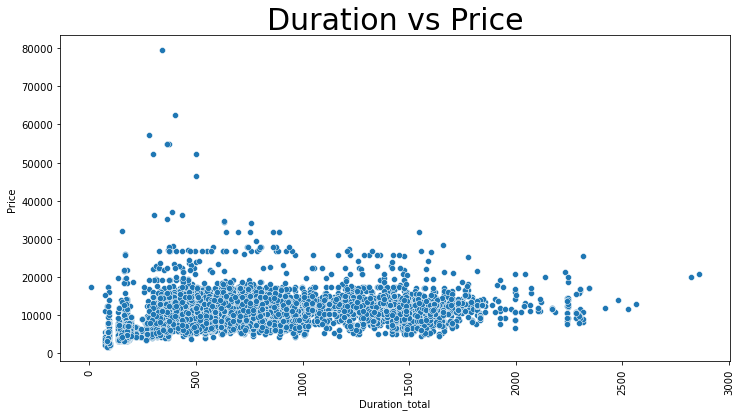

In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration_total'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

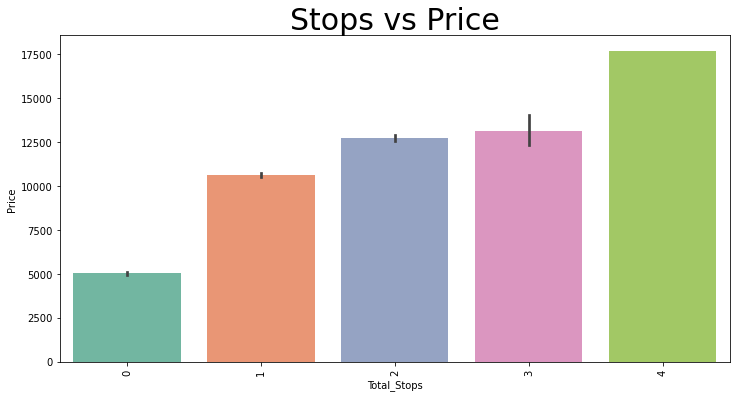

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

as the number of stops are increasing, mean highest price is increasing

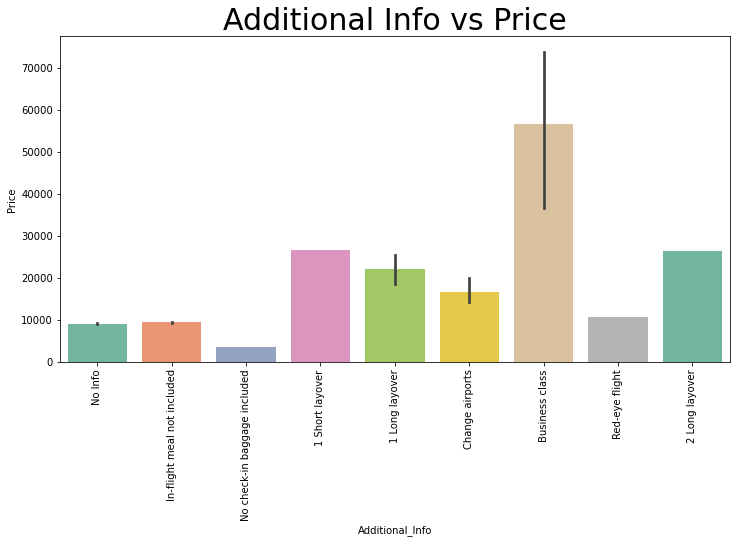

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Highest price is chrgesd for business class

<AxesSubplot:xlabel='Dep_Hr', ylabel='Price'>

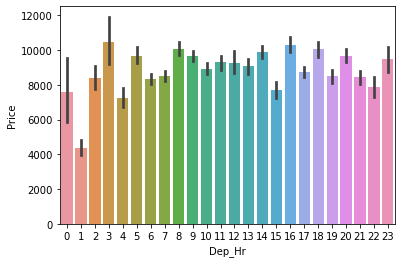

In [66]:
sns.barplot(x='Dep_Hr',y='Price',data=df)

<AxesSubplot:xlabel='Arr_Hr', ylabel='Price'>

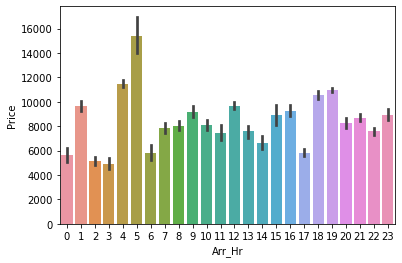

In [67]:
sns.barplot(x='Arr_Hr',y='Price',data=df)

<AxesSubplot:xlabel='Dep_Min', ylabel='Price'>

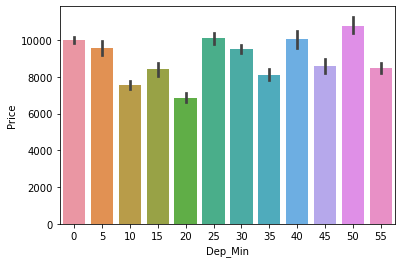

In [68]:
sns.barplot(x='Dep_Min',y='Price',data=df)

<AxesSubplot:xlabel='Arr_Min', ylabel='Price'>

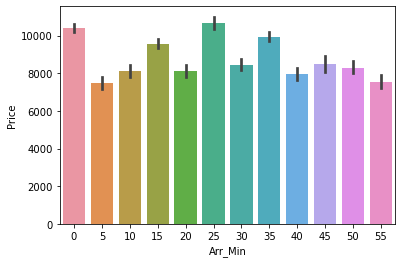

In [69]:
sns.barplot(x='Arr_Min',y='Price',data=df)

In [70]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Duration_total'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  int32 
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Day              10682 non-null  int32 
 12  Month            10682 non-null  int32 
 13  Year             10682 non-null  int32 
 14  Dep_Hr           10682 non-null  int32 
 15  Dep_Min          10682 non-null  int32 
 16  Arr_Hr           10682 non-null  int32 
 17  Arr_Min          10682 non-null

In [72]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_total
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2: 50,0,No Info,...,24,3,2019,22,20,1,10,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7: 25,2,No Info,...,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19:0,2,No Info,...,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5: 25,1,No Info,...,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4: 45,1,No Info,...,1,3,2019,16,50,21,35,4,45,285


In [73]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Duration_Hr','Duration_Min'],axis=1,inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  int32 
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Day              10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Dep_Hr           10682 non-null  int32 
 10  Dep_Min          10682 non-null  int32 
 11  Arr_Hr           10682 non-null  int32 
 12  Arr_Min          10682 non-null  int32 
 13  Duration_total   10682 non-null  int32 
dtypes: int32(9), int64(1), object(4)
memory usage: 1.1+ MB


In [75]:
numericCol=[]
for col in df.columns:
    #print(df[col].dtype)
    if "object"!=df[col].dtype:
        numericCol.append(col)

In [76]:
numericCol

['Total_Stops',
 'Price',
 'Day',
 'Month',
 'Year',
 'Dep_Hr',
 'Dep_Min',
 'Arr_Hr',
 'Arr_Min',
 'Duration_total']

In [77]:
zScores=np.abs(zscore(df[numericCol]))
zScores

array([[1.22066609, 1.12553455, 1.23728754, ..., 1.80043628, 0.8900139 ,
        0.93149778],
       [1.74143186, 0.30906781, 1.47530729, ..., 0.05090913, 0.5870944 ,
        0.38995278],
       [1.74143186, 1.03978296, 0.53179604, ..., 1.3630545 , 0.0187446 ,
        0.97867915],
       ...,
       [1.22066609, 0.40296691, 1.59110426, ..., 0.34249699, 0.2841749 ,
        0.91180524],
       [1.22066609, 0.77218138, 1.47530729, ..., 0.0948848 , 0.8900139 ,
        0.95119033],
       [1.74143186, 0.57809433, 0.53179604, ..., 0.82385444, 0.5870944 ,
        0.28164378]])

In [78]:
filteredEntries=(zScores<3).all(axis=1)

In [79]:
np.sum(filteredEntries)

0

#### no outliers

In [80]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min', 'Arr_Hr',
       'Arr_Min', 'Duration_total'],
      dtype='object')

In [81]:
df=pd.get_dummies(df)

In [82]:
df.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_total', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Addition

In [83]:
df.drop("Additional_Info_No Info",axis=1,inplace=True)

In [84]:
df.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_total', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage includ

In [85]:
X=df.drop('Price',axis=1)
y=df['Price']

## identifying the best random state

In [86]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 2394.643453872553 on random state 32


min RMSE is 2394.643453872553 on random state 32

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)


In [88]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

In [89]:
scaler = StandardScaler()

In [90]:
x_train_scale=scaler.fit_transform(X_train)
x_test_scale=scaler.transform(X_test)

In [91]:
lr=LinearRegression()
lr.fit(x_train_scale,y_train)
pred=lr.predict(x_test_scale)

lrR2=r2_score(y_test, pred)
print(lrR2)
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

0.6886748810292288


2394.6622495497936

In [92]:
svr=SVR()
svr.fit(x_train_scale,y_train)
pred=svr.predict(x_test_scale)
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

4161.121772476814

In [93]:
svrR2=r2_score(y_test, pred)
svrR2

0.05995968865467749

In [94]:
sgd=SGDRegressor()
sgd.fit(x_train_scale,y_train)
pred=sgd.predict(x_test_scale)
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

12402917.59097865

In [95]:
sgdR2=r2_score(y_test, pred)
sgdR2

-8351669.337667133

In [96]:
knnR=KNeighborsRegressor()
knnR.fit(x_train_scale,y_train)
pred=knnR.predict(X_test)
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

6736.546370882101

In [97]:
knnR2=r2_score(y_test, pred)
knnR2

-1.463770405322801

Linear Regression is the best method, as it has the least RMSE(2394.6622495497936) and also the r2 score(0.6886748810292288) is good

In [98]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_total,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,643.020502,...,0.035667,0.087250,0.001779,0.000094,0.000094,0.000374,0.000655,0.185546,0.029957,0.000094
std,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,507.830133,...,0.185468,0.282214,0.042139,0.009676,0.009676,0.019348,0.025592,0.388758,0.170477,0.009676
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,170.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,520.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mean price is 9087 and rmse is 2394 with linear regresssion 

In [99]:
y_test.mean()

8993.440158820193

In [100]:
2394/8993.440158820193

0.26619402116687435

## Hyper Parameter Tuning

In [101]:
operations = [('scaler',StandardScaler()),('lr',LinearRegression())]

In [102]:
param_grid = {'lr__fit_intercept':[True,False], 'lr__normalize':[True,False], 'lr__copy_X':[True, False]}

In [105]:
from sklearn.pipeline import Pipeline

In [107]:
pipe = Pipeline(operations)

In [108]:
grid = GridSearchCV(pipe,param_grid)
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__copy_X': [True, False],
                         'lr__fit_intercept': [True, False],
                         'lr__normalize': [True, False]})

In [109]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [110]:
grid.best_params_

{'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__normalize': False}

In [111]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__copy_X,param_lr__fit_intercept,param_lr__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051600,0.011625,0.003533,0.004750,True,True,True,"{'lr__copy_X': True, 'lr__fit_intercept': True...",0.661124,-6.971419e+19,0.679233,0.676997,0.699819,-1.394284e+19,2.788567e+19,3
1,0.058038,0.003079,0.009004,0.005175,True,True,False,"{'lr__copy_X': True, 'lr__fit_intercept': True...",0.661103,-3.177903e+19,0.679265,0.676990,0.699895,-6.355807e+18,1.271161e+19,1
2,0.048700,0.002861,0.013563,0.003822,True,False,True,"{'lr__copy_X': True, 'lr__fit_intercept': Fals...",-3.071968,-1.694189e+22,-3.238617,-3.534095,-3.127833,-3.388378e+21,6.776757e+21,5
3,0.047401,0.009726,0.005002,0.004706,True,False,False,"{'lr__copy_X': True, 'lr__fit_intercept': Fals...",-3.071968,-1.694189e+22,-3.238617,-3.534095,-3.127833,-3.388378e+21,6.776757e+21,5
4,0.044794,0.007715,0.003732,0.006065,False,True,True,"{'lr__copy_X': False, 'lr__fit_intercept': Tru...",0.661124,-6.971419e+19,0.679233,0.676997,0.699819,-1.394284e+19,2.788567e+19,3
5,0.043901,0.010884,0.010940,0.006827,False,True,False,"{'lr__copy_X': False, 'lr__fit_intercept': Tru...",0.661103,-3.177903e+19,0.679265,0.676990,0.699895,-6.355807e+18,1.271161e+19,1
6,0.041702,0.006839,0.007505,0.001945,False,False,True,"{'lr__copy_X': False, 'lr__fit_intercept': Fal...",-3.071968,-1.694189e+22,-3.238617,-3.534095,-3.127833,-3.388378e+21,6.776757e+21,5
7,0.042489,0.005417,0.007989,0.003573,False,False,False,"{'lr__copy_X': False, 'lr__fit_intercept': Fal...",-3.071968,-1.694189e+22,-3.238617,-3.534095,-3.127833,-3.388378e+21,6.776757e+21,5


## Training with best params

In [112]:
operations = [('scaler',StandardScaler()),('lr',LinearRegression())]
param_grid = {'lr__fit_intercept':[True], 'lr__normalize':[True], 'lr__copy_X':[True]}
pipe = Pipeline(operations)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [114]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [115]:
np.sqrt(mean_squared_error(y_test,pipe.predict(X_test)))

2394.6622495497936

Final Rmse on test set is 2394

In [116]:
df.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_total', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage includ

loading the test set

In [117]:
df1 = pd.read_excel(".//FlightPriceDataSets//Test_Set.xlsx")

In [118]:
def add0M0H(x):
    if 'h' not in x:
        x="0h"+x
    if x[-1]=='h':
        return x+"0m"
    else:
        return x

In [119]:
def removeSpac(x):
    return str(x).strip()

In [120]:
#defining a function to apply same transformations on test set 
def transformDF(dfToTransform):
    dfToTransform['Day'],dfToTransform['Month'],dfToTransform['Year'] = dfToTransform['Date_of_Journey'].str.split('/',3).str
    dfToTransform['Day']=dfToTransform['Day'].astype(int)
    dfToTransform['Month']=dfToTransform['Month'].astype(int)
    dfToTransform['Year']=dfToTransform['Year'].astype(int)
    dfToTransform['Dep_Hr'],dfToTransform['Dep_Min'] = dfToTransform['Dep_Time'].str.split(':',2).str
    dfToTransform['Dep_Hr']=dfToTransform['Dep_Hr'].astype(int)
    dfToTransform['Dep_Min']=dfToTransform['Dep_Min'].astype(int)
    dfToTransform['Arrival_Time'],date1 = dfToTransform['Arrival_Time'].str.split(' ',1).str
    dfToTransform['Arr_Hr'],dfToTransform['Arr_Min'] = dfToTransform['Arrival_Time'].str.split(':',2).str
    dfToTransform['Arr_Hr']=dfToTransform['Arr_Hr'].astype(int)
    dfToTransform['Arr_Min']=dfToTransform['Arr_Min'].astype(int)
    dfToTransform['Duration']=dfToTransform['Duration'].apply(add0M0H)
    dfToTransform['Duration'] = dfToTransform['Duration'].str.replace('h',':').str.replace('m','')
    dfToTransform['Duration_Hr'],dfToTransform['Duration_Min'] = dfToTransform['Duration'].str.split(':',2).str
    dfToTransform['Duration_Hr']=dfToTransform['Duration_Hr'].astype(int)
    dfToTransform['Duration_Min']=dfToTransform['Duration_Min'].apply(removeSpac)
    dfToTransform['Duration_Min']=dfToTransform['Duration_Min'].astype(int)
    dfToTransform['Total_Stops'] = dfToTransform['Total_Stops'].apply(lambda x: "0" if 'non-stop' in x else x)
    dfToTransform['Total_Stops'] = dfToTransform['Total_Stops'].apply(lambda x: x[0])
    dfToTransform['Total_Stops']=dfToTransform['Total_Stops'].astype(int)
    dfToTransform['Additional_Info'] = dfToTransform['Additional_Info'].str.replace('No info','No Info')
    dfToTransform['Duration_total'] = (dfToTransform['Duration_Hr']*60)+dfToTransform['Duration_Min']


In [121]:
transformDF(df1)

In [122]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Duration_total'],
      dtype='object')

In [123]:
df1['Arrival_Time'].unique()[0:10]

array(['04:25', '10:20', '19:00', '21:00', '02:45', '12:35', '22:35',
       '20:30', '12:55', '18:50'], dtype=object)

In [124]:
sorted(df1['Duration_Hr'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [125]:
sorted(df1['Duration_Min'].unique())

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [126]:
df1['Total_Stops'].unique()

array([1, 0, 2, 3, 4])

In [127]:
df1['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [128]:
df1.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Duration_Hr','Duration_Min'],axis=1,inplace=True)

In [129]:
df1=pd.get_dummies(df1)

In [130]:
for column in df1.columns:
    if column not in df.columns:
        print(column)

Additional_Info_No Info


In [131]:
df1.drop('Additional_Info_No Info',axis=1,inplace=True)

In [132]:
for column in df1.columns:
    if column not in df.columns:
        print(column)

In [133]:
for column in df.columns:
    if column not in df1.columns:
        print(column)

Price
Airline_Trujet
Additional_Info_1 Short layover
Additional_Info_2 Long layover
Additional_Info_Red-eye flight


above columns are not present in test set so just adding them except price

In [134]:
df1['Airline_Trujet']=0

In [135]:
df1['Additional_Info_1 Short layover']=0
df1['Additional_Info_2 Long layover']=0
df1['Additional_Info_Red-eye flight']=0

In [138]:
test_actualValues= pd.read_excel(".//FlightPriceDataSets//Sample_submission.xlsx")

In [139]:
df.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_total', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage includ

In [140]:
df.drop('Price',axis=1).head()

,Total_Stops,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_total,Airline_Air Asia,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,24,3,2019,22,20,1,10,170,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,2019,5,50,13,15,445,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,1140,0,...,0,0,0,0,0,0,0,0,0,0
3,1,12,5,2019,18,5,23,30,325,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,285,0,...,0,1,0,0,0,0,0,0,0,0


In [141]:
df1.head()

,Total_Stops,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_total,Airline_Air Asia,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Airline_Trujet,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Red-eye flight
0,1,6,6,2019,17,30,4,25,655,0,...,0,0,0,0,0,0,0,0,0,0
1,1,12,5,2019,6,20,10,20,240,0,...,0,0,0,0,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,1425,0,...,0,0,0,0,1,0,0,0,0,0
3,1,21,5,2019,8,0,21,0,780,0,...,0,0,0,0,0,0,0,0,0,0
4,0,24,6,2019,23,55,2,45,170,1,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df1=df1[df.drop('Price',axis=1).columns]

In [143]:
df1.head()

,Total_Stops,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_total,Airline_Air Asia,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1,6,6,2019,17,30,4,25,655,0,...,0,0,0,0,0,0,0,0,0,0
1,1,12,5,2019,6,20,10,20,240,0,...,0,0,0,0,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,1425,0,...,0,0,0,0,0,0,0,1,0,0
3,1,21,5,2019,8,0,21,0,780,0,...,0,0,0,0,0,0,0,0,0,0
4,0,24,6,2019,23,55,2,45,170,1,...,0,0,0,0,0,0,0,0,0,0


In [146]:
test_Pred=pipe.predict(df1)

Final values predicted for test set is test_Pred

## saving the model


In [147]:
import joblib
joblib.dump(pipe,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']